<a href="https://colab.research.google.com/github/OleFlow/MechineLearning/blob/main/Project_Core.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Adult Data Dataframe

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


##Source of data

Adult csv spreadsheet

##Brief Description of Data:
This dataset contains information about individuals, including demographic and socioeconomic attributes such as age, workclass, education, marital status, occupation, relationship status, race, gender, capital gains, capital losses, hours worked per week, native country, and income level. It is often used for tasks like income classification.

##What is the target?
The target variable is "income," which represents whether an individual earns more than 50,000 annually (>50K) or less than or equal to 50,000 annually (<=50K).

##What does one row represent? (A person? A business? An event? A product?)
One row represents an individual person's information, including their demographic and economic characteristics.

##Is this a classification or regression problem?
This is a classification problem because the goal is to classify individuals into two income groups: ">50K" or "<=50K."

##How many features does the data have?
The data has 14 features, including age, workclass, fnlwgt, education, educational-num, marital status, occupation, relationship, race, gender, capital gain, capital loss, hours per week, and native country.

##How many rows are in the dataset?
The dataset contains a total of 48,842 rows, each representing an individual.

##What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?
Challenges that may be encountered when working with this dataset include:

1. Handling missing or unknown values in some features (e.g., "?" in workclass and occupation).
2. Exploring and understanding the distribution of categorical features.
Dealing with class imbalance in the target variable (there may be significantly more individuals earning "<=50K" than ">50K").
3. Choosing appropriate encoding methods for categorical variables.
4. Balancing interpretability and complexity when modeling, as different algorithms may have varying levels of explainability.
5. Assessing feature importance and selecting the most relevant features for modeling.
6. Evaluating and fine-tuning machine learning models to achieve the desired classification accuracy.


In [ ]:
# Load the dataset
file_path = "/content/drive/MyDrive/CodingDojo/02-MachineLearning/Week05/Data/adult.csv"

# Load the dataset with column names inferred from the first row
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')


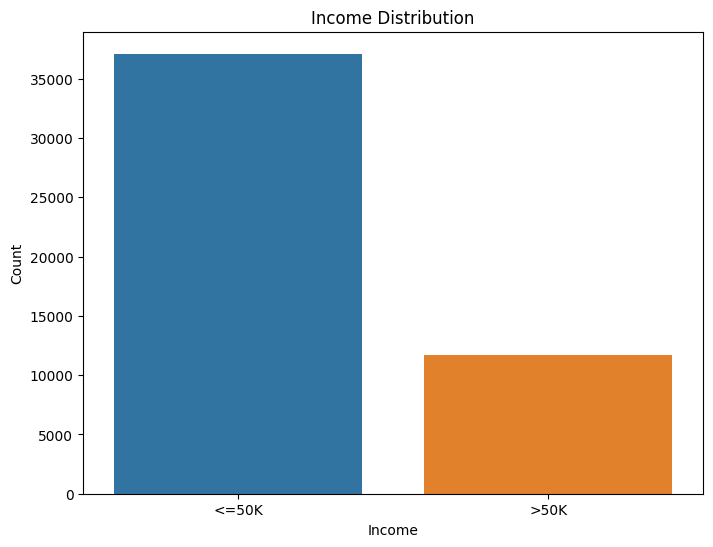

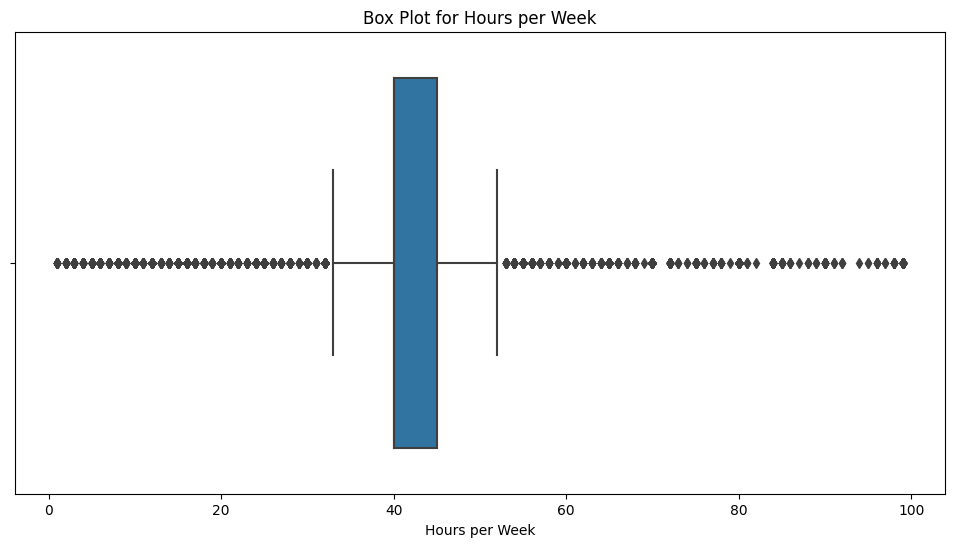

In [28]:
# Check the column names
print(data.columns)

# Drop unnecessary columns
data.drop(['fnlwgt', 'educational-num'], axis=1)

# Remove duplicate rows
data = data.drop_duplicates()

# Check for missing values
missing_values = data.isnull().sum()

# Handle missing values based on data analysis
# For example, fill missing values in categorical columns with mode, and numerical columns with median
data['workclass'].fillna(data['workclass'].mode()[0], inplace=True)
data['occupation'].fillna(data['occupation'].mode()[0], inplace=True)
data['native-country'].fillna(data['native-country'].mode()[0], inplace=True)

# Ensure consistency in categorical values
data['marital-status'] = data['marital-status'].str.strip()
data['gender'] = data['gender'].str.lower()

# Univariate visualizations for the target variable 'income'
plt.figure(figsize=(8, 6))
sns.countplot(x='income', data=data)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

# Identify outliers using box plots
plt.figure(figsize=(12, 6))
sns.boxplot(x='hours-per-week', data=data)
plt.title('Box Plot for Hours per Week')
plt.xlabel('Hours per Week')
plt.show()



<ipython-input-29-35b9e46f2012>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


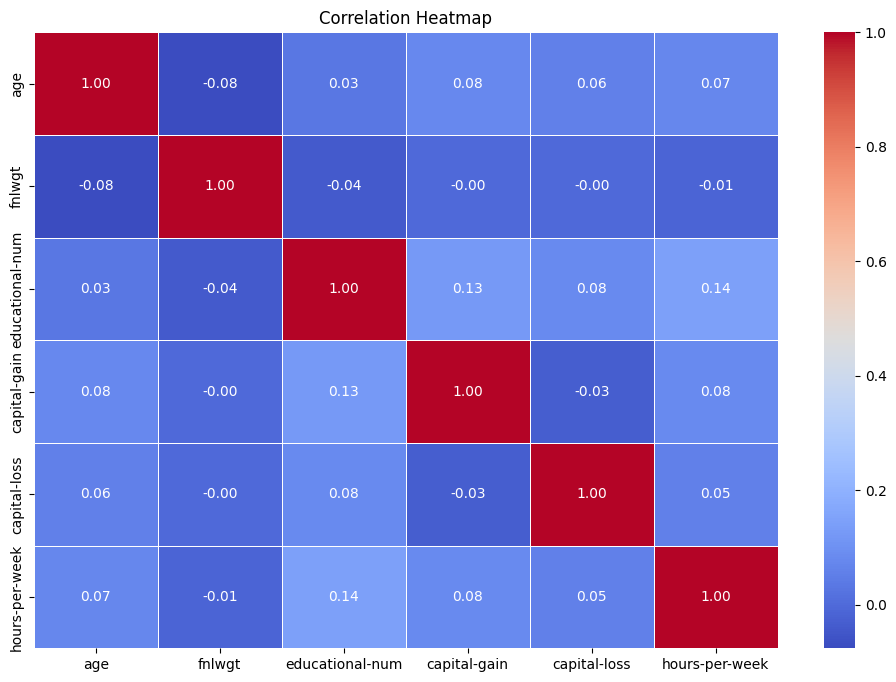

In [29]:
#Identifying Correlations with Correlation Heatmap:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Plot a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

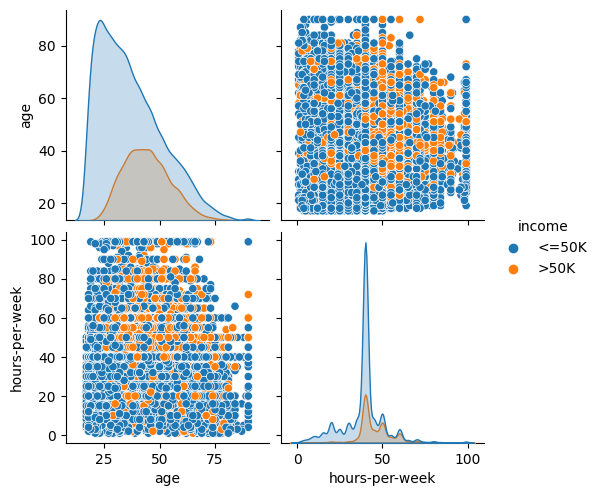

In [30]:

# Modify the selected columns based on the actual column names in your dataset
selected_cols = ['age', 'workclass', 'education','occupation',  'gender', 'hours-per-week', 'income']

# Create a pair plot
sns.pairplot(data[selected_cols], hue='income', diag_kind='kde')
plt.show()

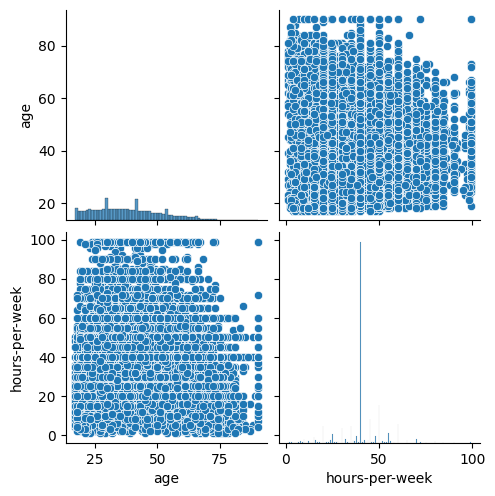

In [31]:
# Select numerical columns for the scatter plot matrix
numerical_cols = ['age',  'hours-per-week', 'income']

# Create a scatter plot matrix
sns.pairplot(data[numerical_cols])
plt.show()

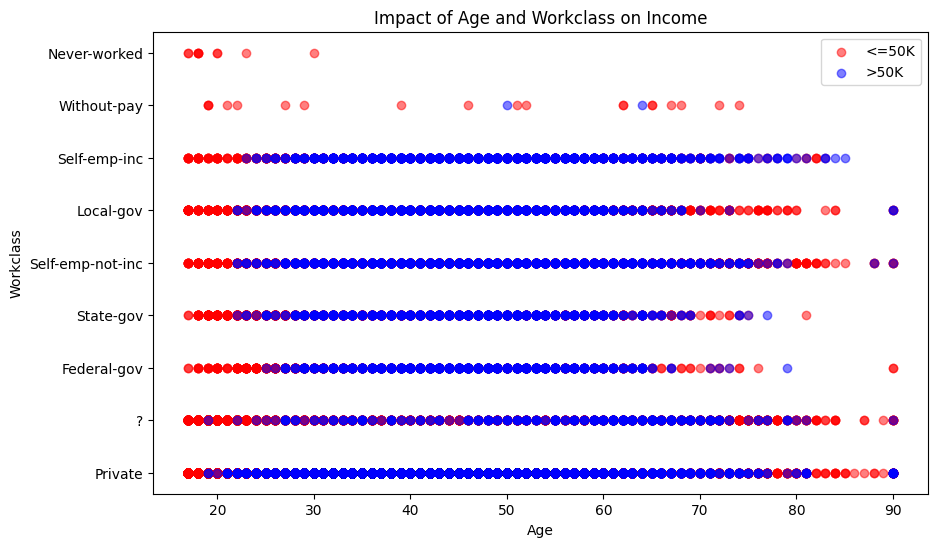

In [32]:
# Filter out rows with missing income values
data = data[data['income'].isin(['<=50K', '>50K'])]

# Define colors for income categories
colors = {'<=50K': 'red', '>50K': 'blue'}

# Create the scatter plot
plt.figure(figsize=(10, 6))
for income_category, color in colors.items():
    subset = data[data['income'] == income_category]
    plt.scatter(subset['age'], subset['workclass'], label=income_category, color=color, alpha=0.5)

plt.xlabel('Age')
plt.ylabel('Workclass')
plt.legend()
plt.title('Impact of Age and Workclass on Income')
plt.show()

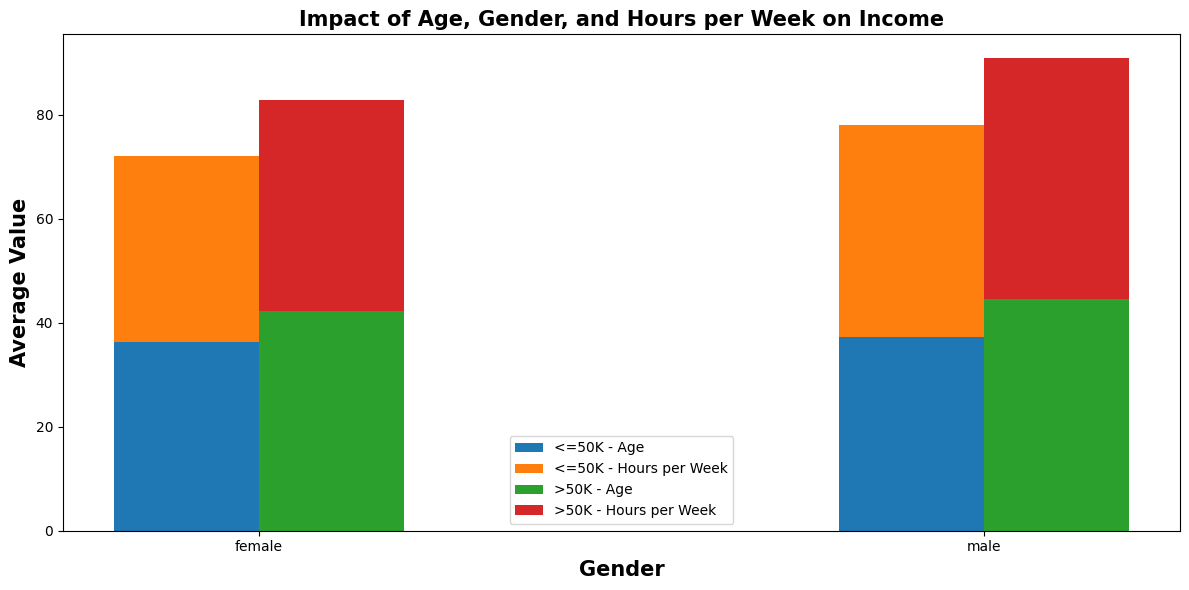

In [33]:
# Filter out rows with missing income values
data = data[data['income'].isin(['<=50K', '>50K'])]

# Group data by gender, income, and calculate mean age and hours-per-week
grouped_data = data.groupby(['gender', 'income']).agg({'age': 'mean', 'hours-per-week': 'mean'}).reset_index()

# Get unique genders and income levels
genders = grouped_data['gender'].unique()
incomes = grouped_data['income'].unique()

# Create the grouped bar plot
fig, ax = plt.subplots(figsize=(12, 6))

# Set the width of the bars
bar_width = 0.2

# Set the positions of the bars on X-axis
r1 = range(len(genders))
r2 = [p + bar_width for p in r1]

# Plot the bars for each income level
for i, income in enumerate(incomes):
    ax.bar(r1 if i == 0 else r2, grouped_data[grouped_data['income'] == income]['age'], width=bar_width, label=f'{income} - Age')
    ax.bar(r1 if i == 0 else r2, grouped_data[grouped_data['income'] == income]['hours-per-week'], width=bar_width, label=f'{income} - Hours per Week', bottom=grouped_data[grouped_data['income'] == income]['age'])

# Add xticks on the middle of the group bars
ax.set_xticks([r + bar_width/2 for r in range(len(genders))])
ax.set_xticklabels(genders)

# Labeling
plt.xlabel('Gender', fontweight='bold', fontsize=15)
plt.ylabel('Average Value', fontweight='bold', fontsize=15)
plt.title('Impact of Age, Gender, and Hours per Week on Income', fontweight='bold', fontsize=15)
plt.legend()

plt.tight_layout()
plt.show()

In [34]:
# Drop unnecessary columns
data.drop(['fnlwgt', 'educational-num'], axis=1, inplace=True)  # Drop columns 'fnlwgt' and 'educational-num'

# Remove duplicate rows
data.drop_duplicates(inplace=True)  # Remove duplicate rows

# Check for missing values
missing_values = data.isnull().sum()

# Handle missing values based on data analysis
data['workclass'].fillna(data['workclass'].mode()[0], inplace=True)
data['occupation'].fillna(data['occupation'].mode()[0], inplace=True)
data['native-country'].fillna(data['native-country'].mode()[0], inplace=True)

# Ensure consistency in categorical values
data['marital-status'] = data['marital-status'].str.strip()
data['gender'] = data['gender'].str.lower()

# Filter out rows with missing income values
data = data[data['income'].isin(['<=50K', '>50K'])]

# Encode categorical variables
data = pd.get_dummies(data, columns=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income'], drop_first=True)

# Select features (X) and target variable (y)
X = data.drop('income_>50K', axis=1)  # Features
y = data['income_>50K']  # Target variable

# Scale numerical features
from sklearn.preprocessing import StandardScaler

numerical_cols = ['age', 'hours-per-week']
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

In [ ]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models and hyperparameters for GridSearchCV
models = {
    'Logistic Regression': (LogisticRegression(), {'C': [0.1, 1, 10]}),
    'Random Forest': (RandomForestClassifier(), {'n_estimators': [50, 100, 200]}),
    'SVM': (SVC(), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}),
    'KNN': (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7]})
}

# Evaluate each model with multiple metrics
metrics = {
    'Accuracy': accuracy_score,
    'Precision': precision_score,
    'Recall': recall_score,
    'F1 Score': f1_score,
    'ROC AUC': roc_auc_score
}

# Dictionary to store best tuned models and their metrics
best_models = {}

# Iterate through models and evaluate each
for model_name, (model, param_grid) in models.items():
    # GridSearchCV to tune hyperparameters
    grid_search = GridSearchCV(model, param_grid, scoring='accuracy', cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Get the best tuned model
    best_model = grid_search.best_estimator_
    best_models[model_name] = best_model

    # Evaluate the best model on train and test data
    train_predictions = best_model.predict(X_train)
    test_predictions = best_model.predict(X_test)

    print(f"Metrics for {model_name}:")
    for metric_name, metric_func in metrics.items():
        train_metric = metric_func(y_train, train_predictions)
        test_metric = metric_func(y_test, test_predictions)
        print(f"{metric_name}: Train - {train_metric:.4f}, Test - {test_metric:.4f}")

# Display the metrics of the best tuned version of each model type
for model_name, best_model in best_models.items():
    print(f"\nMetrics for the best tuned {model_name}:")
    # Fit the best tuned model on the full training data
    best_model.fit(X_train, y_train)

    # Evaluate on train and test data
    train_predictions = best_model.predict(X_train)
    test_predictions = best_model.predict(X_test)

    for metric_name, metric_func in metrics.items():
        train_metric = metric_func(y_train, train_predictions)
        test_metric = metric_func(y_test, test_predictions)
        print(f"{metric_name}: Train - {train_metric:.4f}, Test - {test_metric:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Metrics for Logistic Regression:
Accuracy: Train - 0.8343, Test - 0.8325
Precision: Train - 0.7099, Test - 0.7143
Recall: Train - 0.5490, Test - 0.5442
F1 Score: Train - 0.6192, Test - 0.6178
ROC AUC: Train - 0.7380, Test - 0.7361


I used the The K-Nearest Neighbors (KNN)
Accuracy: 72% accuracy is a reasonable starting point

#Wines Spa Dataframe



##Source of data

Wines Spa csv spreadsheet

#Brief Description of Data:

The dataset appears to be related to wines and wineries in Spain. It includes information about different wines, their characteristics, and relevant details.
##What is the Target?

The target variable is not explicitly mentioned in the provided data. To identify the target variable, you would need to specify what you want to predict or analyze in this dataset. It could be related to wine ratings, prices, or any other specific aspect.
##What Does One Row Represent?

One row in the dataset represents information about a specific wine, including details about the winery, wine name, vintage year, ratings, number of reviews, country, region, price, wine type, body, and acidity.
##Is This a Classification or Regression Problem?

The nature of the problem (classification or regression) depends on the specific analysis or prediction task you want to perform. For example, if you want to predict wine ratings (which can be continuous), it's a regression problem. If you want to classify wines into categories based on certain criteria, it's a classification problem.
##How Many Features Does the Data Have?

The dataset has 11 features: "winery," "wine," "year," "rating," "num_reviews," "country," "region," "price," "type," "body," and "acidity."
##How Many Rows Are in the Dataset?

The dataset appears to contain a total of 7500 rows.
#What, If Any, Challenges Do You Foresee in Cleaning, Exploring, or Modeling This Dataset?

Challenges that you might encounter when working with this dataset could include:
1. Missing data: Check for missing values in any of the columns and decide how to handle them.
2. Data types: Ensure that data types are appropriate for each column (e.g., numerical, categorical).
3. Outliers: Identify and address outliers in numerical columns like "price," "rating," and "num_reviews."
3. Feature engineering: Consider creating new features or extracting information from existing ones.
4. Data exploration: Explore the data to understand relationships and patterns.
5. Data visualization: Create visualizations to gain insights from the data.
6. Model selection: Decide on the type of analysis or predictive model that suits your goals.
7. Evaluation metrics: Determine appropriate evaluation metrics based on the nature of the problem (classification or regression).

In [ ]:
# Load the dataset
file_path = "/content/drive/MyDrive/CodingDojo/02-MachineLearning/Week05/Data/wines_SPA.csv"

# Load the dataset with column names inferred from the first row
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


<ipython-input-9-c5571b785a7a>:11: FutureWarning: The default value of regex will change from True to False in a future version.
  data['year'] = data['year'].str.replace('N.V', '2023')


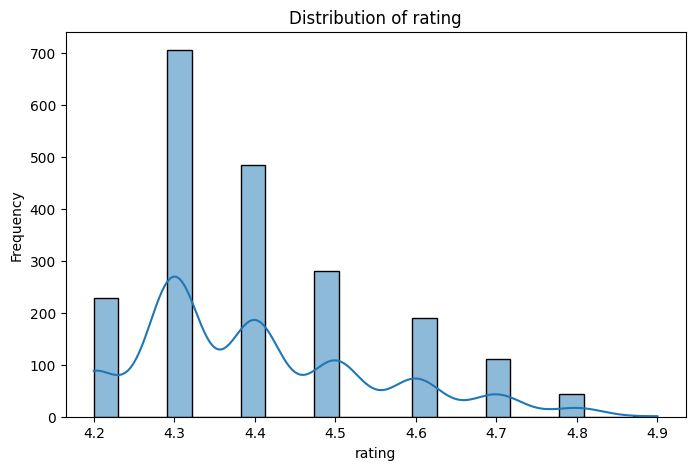

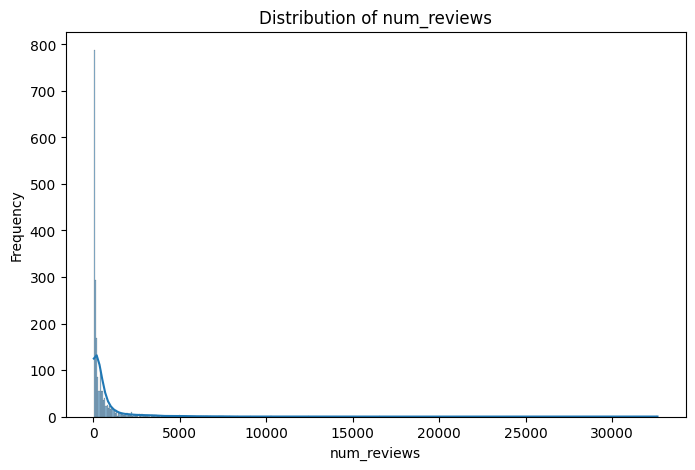

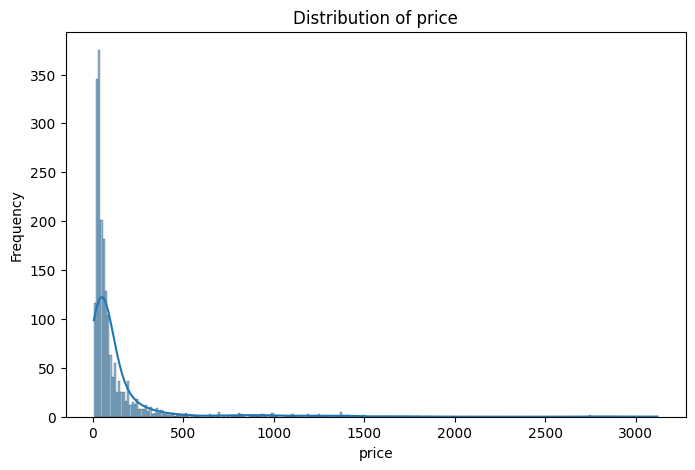

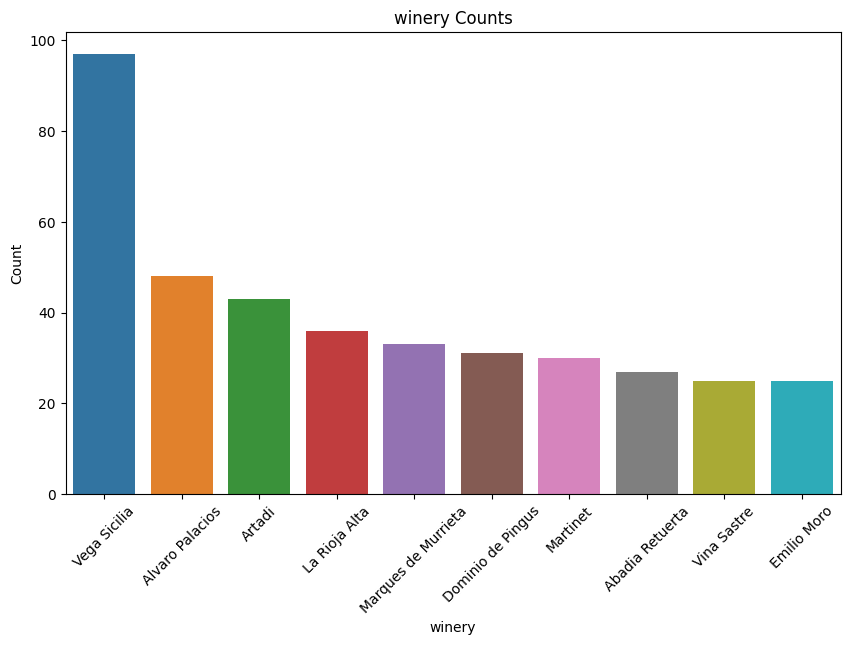

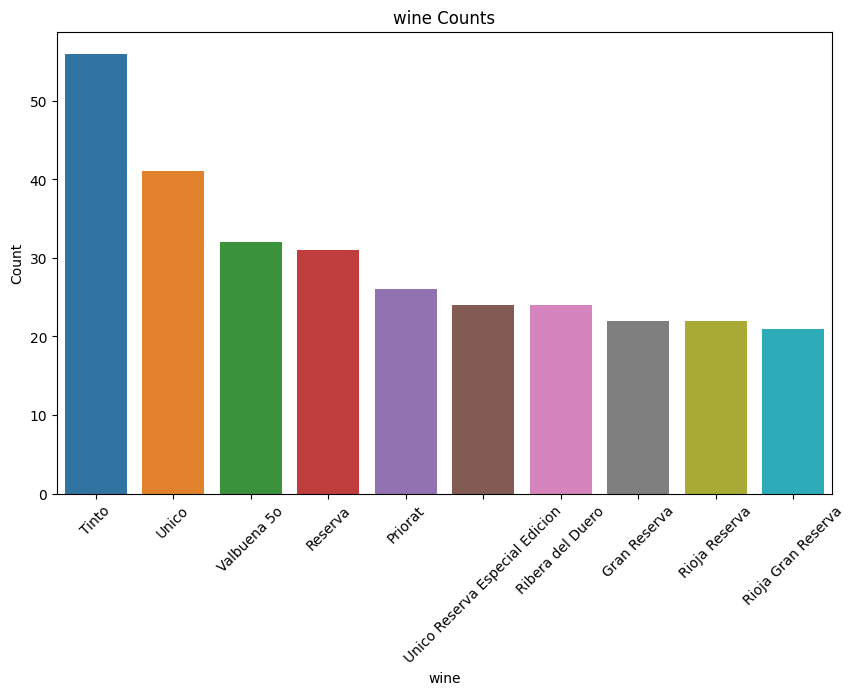

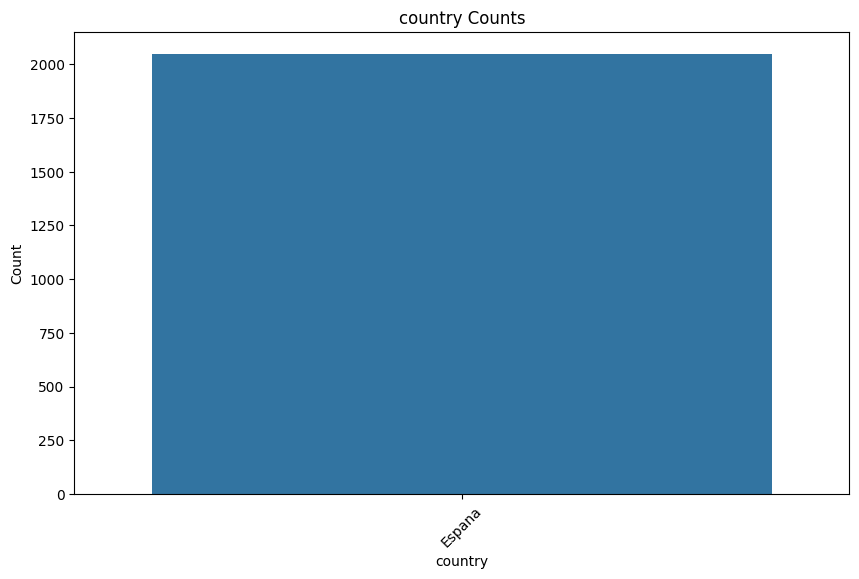

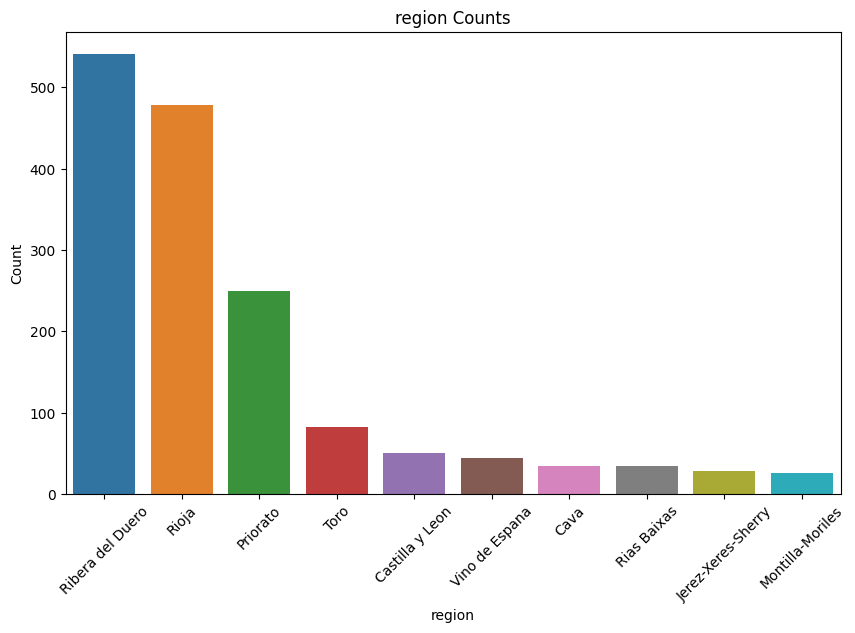

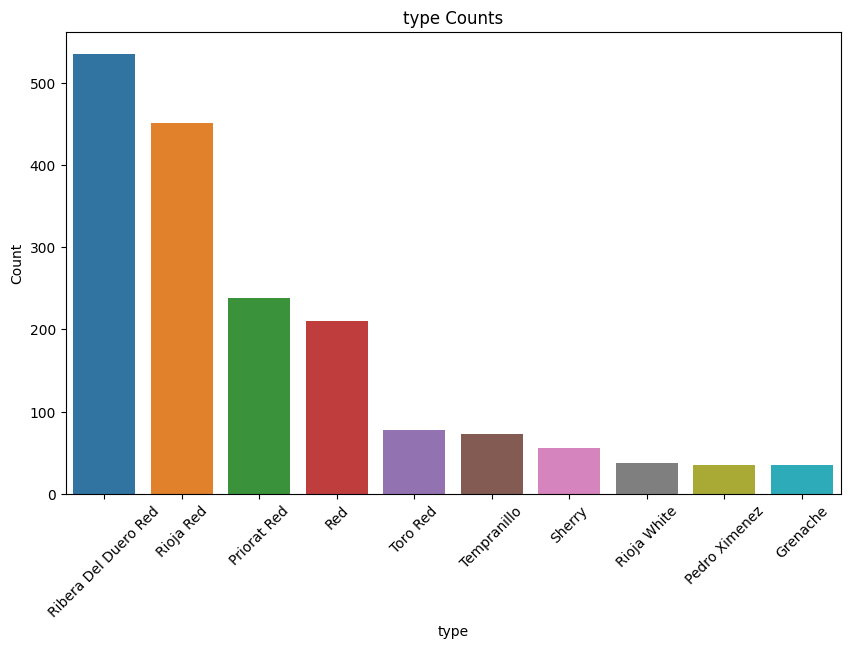

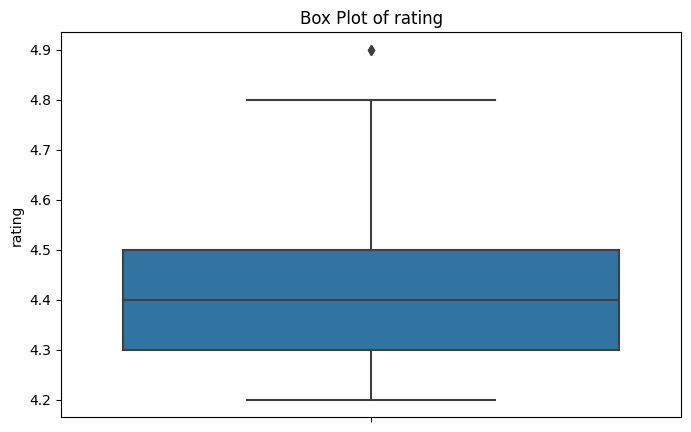

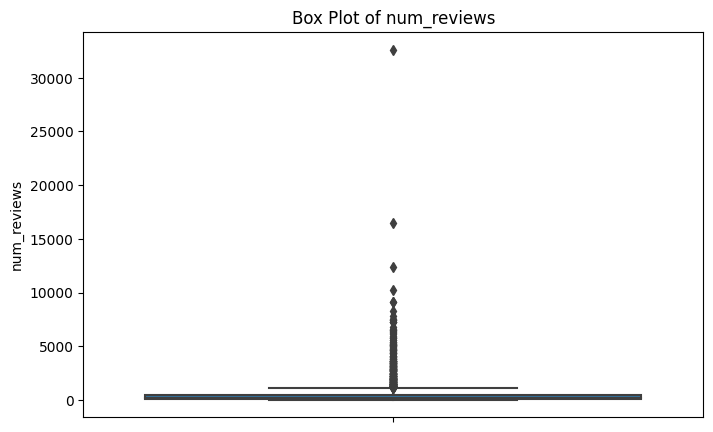

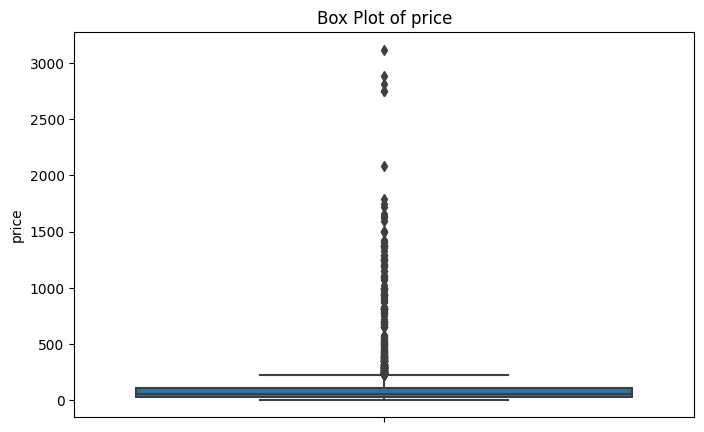

In [ ]:
# Remove duplicate rows
data = data.drop_duplicates()
# Check for missing values
missing_values = data.isnull().sum()

# Address missing values in 'body' and 'acidity' columns by filling with reasonable values
data['body'].fillna(0, inplace=True)
data['acidity'].fillna(0, inplace=True)

# Correct inconsistencies in categorical values
data['year'] = data['year'].str.replace('N.V', '2023')
data['body'] = data['body'].fillna(0)
data['acidity'] = data['acidity'].fillna(0)

# Produce univariate visuals
# Histograms for numeric columns
numeric_columns = ['rating', 'num_reviews', 'price']

for col in numeric_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Bar plots for categorical columns
categorical_columns = ['winery', 'wine', 'country', 'region', 'type']

for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=col, order=data[col].value_counts().index[:10])
    plt.title(f'{col} Counts')
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

# Identify outliers
for col in numeric_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=data, y=col)
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
    plt.show()